<a href="https://colab.research.google.com/github/Nivedhidha-I/Linear_Regression/blob/main/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Model (Recreation)

`Simple linear regression is a type of regression model used to analyse the linear relationship between one independent and one dependent numeric variables. The dependent variable can be predicted using the independent variable as an input through the formed model.`

## Process to follow:
1. Import the required libraries
2. Creation of Machine Learning Model
3. Importing the dataset into the environment
4. Preprocessing the dataset
5. Data Analysis
6. Fitting of Dataset different ways by changing the parameters
7. Prediction and showing difference of accuracy

### Importing the required libraries

In [ ]:
# for handling the dataset
import numpy as np
import pandas as pd
# for data visualization purpose
import matplotlib.pyplot as plt
# for splitting of data into train and test
from sklearn.model_selection import train_test_split
# for checking accuracy score
from sklearn.metrics import r2_score

### Creation of Machine Learning Model

In [ ]:
class LinearRegression:
    # constructor function - to set parameters on how we want the linear regression model to work
    def __init__(self, scale = "none", update = False, no_intercept = False):
        self.__X = np.array([])
        self.__Y = np.array([])
        self.__scale = scale
        self.__update = update
        self.__no_intercept = no_intercept
        self.M = 0
        self.C = 0

    # scaling function - uses two different methods based on given parameter by used
    def __scaling(self):
        # normal - min_max scaling method or normalization
        if self.__scale == "normal":
            maxX = max(self.__X)
            minX = min(self.__X)
            for i in range(len(self.__X)):
                self.__X[i] = (self.__X[i] - minX) / (maxX - minX)

        # standard - z_score method or standardization
        elif self.__scale == "standard":
            mean = np.mean(self.__X)
            sd = (sum([((x - mean) ** 2) for x in self.__X]) / len(self.__X)) ** 0.5
            for i in range(len(self.__X)):
                self.__X[i] = (self.__X[i] - mean) / sd

    # fit function - gets input of X and Y list and finds m and c for the line
    def fit(self, X, Y):
        # storing a copy of the data points
        self.__X = np.array(X)
        self.__Y = np.array(Y)
        # calling scaling function if scaling required
        if(self.__scale) != "none":
            self.__scaling()
        # fitting the dataset into a model i.e. finding the value for M and C
        sX2 = np.sum(np.power(self.__X, 2))
        sXY = np.sum(np.multiply(self.__X, self.__Y))
        # if parameter says to exclude intercept value for calculation
        if self.__no_intercept:
            self.C = 0
            self.M = sXY / sX2
        # if parameter says to include intercept value for calculation
        else:
            sX = np.sum(self.__X)
            sY = np.sum(self.__Y)
            self.C = (sX * sXY - sX2 * sY) / (sX * sX - sX2 * len(self.__X))
            self.M = (sY - len(self.__X) * self.C) / sX

    # predict function - gets an one dimentional array as input and returns respective y values
    def predict(self, x_pred):
        y_pred = []
        for x in x_pred:
            y_pred.append(self.C + (self.M * float(x)))
        # if parameter says to update the M and C values based on new predictions
        if self.__update:
            self.__X = np.append(self.__X, x_pred)
            self.__Y = np.append(self.__Y, y_pred)
            self.fit(self.__X, self.__Y)
        return y_pred

    # cov function - finds the covariance between the two variables X and Y
    def __cov(self):
        x_ = np.mean(self.__X)
        y_ = np.mean(self.__Y)
        cov = np.mean(np.multiply(np.subtract(self.__X, x_), np.subtract(self.__Y, y_)))
        return cov

    # R2 function - finds the R-squared value of the model
    def __R2(self):
        sse, sst = 0, 0
        y_pred = np.array(self.predict(self.__X))
        y_ = np.mean(self.__Y)
        sse = np.sum(np.power(np.subtract(self.__Y, y_pred), 2))
        sst = np.sum(np.power(np.subtract(self.__Y, y_), 2))
        R2 = 1 - (sse / sst)
        return R2

    # RMSE function - finds the RMSE value of the model
    def __RMSE(self):
        y_pred = np.array(self.predict(self.__X))
        RMSE = np.mean(np.power(np.subtract(self.__Y, y_pred), 2)) ** 0.5
        return RMSE

    # pearson_coefficient function - finds the Pearson correlation coefficient value
    def __pearson(self):
        x_ = np.mean(self.__X)
        y_ = np.mean(self.__Y)
        num = np.sum(np.multiply(np.subtract(self.__X, x_), np.subtract(self.__Y, y_)))
        den = (np.sum(np.power(np.subtract(self.__X, x_), 2)) * np.sum(np.power(np.subtract(self.__Y, y_), 2))) ** 0.5
        r = num / den
        return r

    # accuracy function - prints all the different accuracy scores for the model
    def accuracy(self):
        print("Covariance value of Model: ")
        print(str(self.__cov()))
        print("R-squared value of Model: ")
        print(str(self.__R2()))
        print("RMSE value of Model: ")
        print(str(self.__RMSE()))
        print("Pearson coefficient value of Model: ")
        print(str(self.__pearson()))

    # plot function - shows a visual representation for our model
    def plot(self):
        y_pred = self.predict(self.__X)
        # scatter plot for actual X and Y
        plt.scatter(self.__X, self.__Y)
        # line graph for X and y_pred
        plt.plot(self.__X, y_pred, color='red')
        plt.show()

    # summary function - shows a detailed summary of the model
    def summary(self):
        print("The options chosen for the model are: ")
        print("Scaling Type: " + str(self.__scale))
        print("Updation Process: " + str(self.__update))
        print("Excluding Intercept: " + str(self.__no_intercept))
        print("\nModel Equation:")
        print("y = " + str(self.M) + " x + " + str(self.C))
        print("\nAccuracy Scores: ")
        self.accuracy()
        print("\nGraphical Representation of Model: ")
        self.plot()

### Importing the dataset into the environment

In [ ]:
# importing the datasets and combining together
train_data = pd.read_csv("train.csv").iloc[:, 22:24]
test_data = pd.read_csv("test.csv").iloc[:, 22:24]
data = train_data.append(test_data)

### Preprocessing the dataset

In [ ]:
# checking for NA values
print("No of rows having Null Values(Before Removing): \n", data.isnull().sum())
# handling NA values by dropping the rows
data = data.dropna()
print("No of rows having Null Values(Before Removing): \n", data.isnull().sum())
# splitting the dataset into independent and dependent variables
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

No of rows having Null Values(Before Removing): 
 Departure Delay in Minutes      0
Arrival Delay in Minutes      393
dtype: int64
No of rows having Null Values(Before Removing): 
 Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64


### Data Analysis

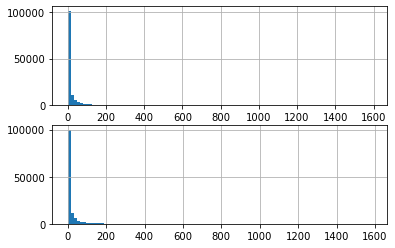

In [ ]:
# histogram graph
fig, axes = plt.subplots(2, 1)
X.hist(bins = 100, ax = axes[0])
Y.hist(bins = 100, ax = axes[1])
plt.show()

Most of the data points fall near 0. Hence the data is right skewed and doesn't follow normal distribution.

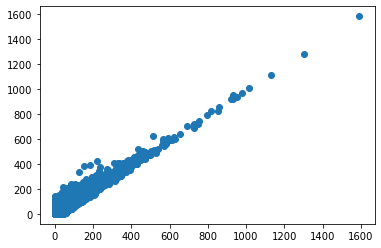

In [ ]:
# scatter plot
plt.scatter(X, Y)
plt.show()

All the points are close by and not scattered hence we can clearly observe a linear relationship between the variables.

### Fitting of Dataset different ways by changing the parameters

In [ ]:
# splitting of dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
# Model formation with default settings
lrR = LinearRegression()
lrR.fit(X_train, Y_train)
# Model formation with scaling mode: "standard"
lrS = LinearRegression(scale = "standard")
lrS.fit(X_train, Y_train)
# Model formation with scaling mode: "normal"
lrN = LinearRegression(scale = "normal")
lrN.fit(X_train, Y_train)
# Model formation with update mode: True
lrU = LinearRegression(update = True)
lrU.fit(X_train, Y_train)
# Model formation with no_intercept mode: True
lrI = LinearRegression(no_intercept = True)
lrI.fit(X_train, Y_train)

### Prediction and showing difference of accuracy

The options chosen for the model are: 
Scaling Type: none
Updation Process: False
Excluding Intercept: False

Model Equation:
y = 0.9801151112844574 x + 0.7573878149240905

Accuracy Scores: 
Covariance value of Model: 
1349.3153089962093
R-squared value of Model: 
0.9286358312764977
RMSE value of Model: 
10.081209817941854
Pearson coefficient value of Model: 
0.963657528002816

Graphical Representation of Model: 


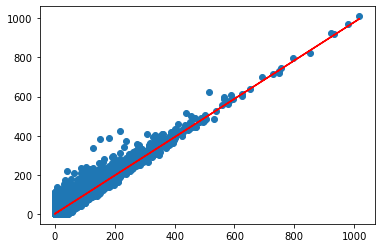

0.936697419302525
The options chosen for the model are: 
Scaling Type: standard
Updation Process: False
Excluding Intercept: False

Model Equation:
y = 43.02049187495957 x + 7.318083710897617

Accuracy Scores: 
Covariance value of Model: 
28.344917825462396
R-squared value of Model: 
0.8562596475699671
RMSE value of Model: 
14.307438926003044
Pearson coefficient value of Model: 
0.9253429891504916

Graphical Representation of Model: 


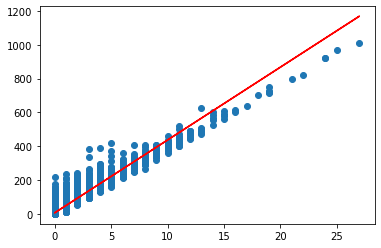

-0.09224664377982195
The options chosen for the model are: 
Scaling Type: normal
Updation Process: False
Excluding Intercept: False

Model Equation:
y = 996.0546677100938 x + 14.945332289886114

Accuracy Scores: 
Covariance value of Model: 
0.010256339507439583
R-squared value of Model: 
0.007173489507903752
RMSE value of Model: 
37.60185156063467
Pearson coefficient value of Model: 
0.08469645510825047

Graphical Representation of Model: 


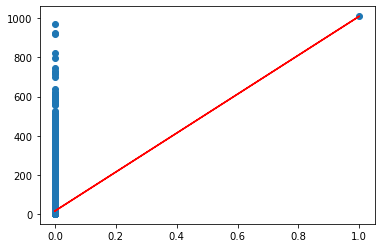

-0.1386030945364214
The options chosen for the model are: 
Scaling Type: none
Updation Process: False
Excluding Intercept: True

Model Equation:
y = 0.9870306000583773 x + 0

Accuracy Scores: 
Covariance value of Model: 
1349.3153089962093
R-squared value of Model: 
0.9282863078988836
RMSE value of Model: 
10.10586725218043
Pearson coefficient value of Model: 
0.963657528002816

Graphical Representation of Model: 


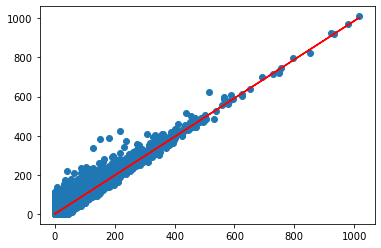

0.9372606170489715


In [ ]:
lrR.summary()
y_predR = lrR.predict(X_test)
print(r2_score(y_predR, Y_test))

lrS.summary()
y_predS = lrS.predict(X_test)
print(r2_score(y_predS, Y_test))

lrN.summary()
y_predN = lrN.predict(X_test)
print(r2_score(y_predN, Y_test))

#lrU.summary()
#y_predU = lrU.predict(X_test)
#print(r2_score(y_predU, Y_test))

lrI.summary()
y_predI = lrI.predict(X_test)
print(r2_score(y_predI, Y_test))

When using the parameter of scale for normalization or standardization the accuracy decreases for this dataset hence we should leave it default ie the actual dataset.

The options chosen for the model are: 
Scaling Type: none
Updation Process: False
Excluding Intercept: True

Model Equation:
y = 0.9870306000583773 x + 0

Accuracy Scores: 
Covariance value of Model: 
1349.3153089962093
R-squared value of Model: 
0.9282863078988836
RMSE value of Model: 
10.10586725218043
Pearson coefficient value of Model: 
0.963657528002816

Graphical Representation of Model: 


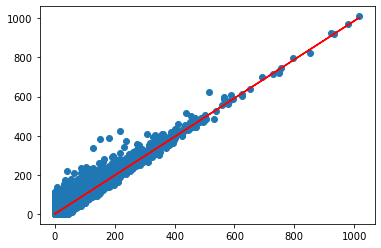

In [ ]:
# best model accuracy
lr = LinearRegression(scale = "none", update = False, no_intercept = True)
lr.fit(X_train, Y_train)
lr.summary()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2_score(y_pred, Y_test)

0.9372606170489715